# CoCoRaHS - Get station data

Use this notebook to get the data from all or a specific station between specified dates.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
import io
import pandas as pd

Select a county, or use all counties.

In this example we want to get the rain gauges in Cook County, IL.

In [3]:
counties = ["CK"] # Cook county
# counties = ["AD","AL","BD","BN","BR","BU","CH","CR","CS","CP","CN","CL","CY","CT","CE","CK","CW","CM","DK","DW","DG","DP","ED","EW","EF","FY","FD","FK","FL","GL","GR","GY","HM","HN","HR","HD","HY","IR","JK","JS","JF","JR","JD","JH","KN","KK","KD","KX","LK","LS","LW","LE","LV","LG","MCD","MCH","MCL","MA","MP","MD","MN","MH","MS","MC","ME","MR","MO","MY","MG","MU","OG","PR","PY","PT","PK","PP","PL","PM","RH","RC","RI","SC","SL","SG","SY","ST","SH","SK","SP","TZ","UN","VR","WB","WR","WS","WY","WH","WD","WL","WM","WN","WF"]

Set the parameters. Here we want to get the data for the whole month of April 2013.

In [4]:
params = {
   "ReportType": "Daily",
   "dtf": 1,
   "Format": "CSV",
   "State": "IL",
   "ReportDataType": "reportdate",
   "StartDate": "4/1/2013",
   "EndDate": "4/30/2013",
   "TimesInGMT": "False"
}
xml_responses = {}
for county in counties:
    params.update({
        "County": county
    })
    xml_responses[county] = requests.get("http://data.cocorahs.org/export/exportreports.aspx", params=params)

Get the XML response text and convert it to string.

Use `read_csv` from pandas to convert that to a dataframe, and concatenate all the county dataframes.

In [5]:
df = pd.DataFrame()
for county in counties:
    df_county = pd.read_csv(io.StringIO(xml_responses[county].text), delimiter=',',header=0)
    df = pd.concat([df,df_county])

Convert the `ObservationDate` column values to a pandas datetime objects, sort by date, and reset the index so that it follows the same order as the date column.

In [6]:
df['ObservationDate'] = pd.to_datetime(df.ObservationDate)
df = df.sort_values(by='ObservationDate')
df = df.reset_index(drop=True)

Convert the `TotalPrecipAmt` column from string to numeric values. In case of errors (when values are letters instead of numbers), force the converted value to be NaN by using `coerce`.

In [7]:
df['TotalPrecipAmt'] = pd.to_numeric(df['TotalPrecipAmt'],errors='coerce')

Check the output.

In [8]:
df

,ObservationDate,ObservationTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,NewSnowDepth,NewSnowSWE,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2013-04-01,07:00 AM,2013-04-07 08:39 AM,IL-CK-64,Homewood 0.1 ESE,41.557694,-87.659444,0.00,0.0,NA,NA,NA,2013-04-07 06:39 AM
1,2013-04-01,08:00 AM,2013-04-03 07:10 AM,IL-CK-87,Arlington Heights 1.3 SW,42.082221,-88.001904,0.00,0.0,NA,NA,NA,2013-04-03 05:14 AM
2,2013-04-01,07:00 AM,2013-04-09 03:02 PM,IL-CK-175,Winnetka 1.2 S,42.088900,-87.740000,0.00,0.0,NA,NA,NA,2013-04-09 01:02 PM
3,2013-04-01,07:00 AM,2013-04-03 07:22 PM,IL-CK-168,Ravenswood Manor 0.1 ESE,41.964176,-87.697392,0.00,0.0,NA,NA,NA,2013-04-03 05:26 PM
4,2013-04-01,07:00 AM,2013-04-04 12:43 AM,IL-CK-208,Glenview 1.2 WNW,42.088787,-87.835754,0.00,0.0,NA,NA,NA,2013-04-03 10:43 PM
5,2013-04-01,07:00 AM,2013-04-02 06:26 AM,IL-CK-163,Arlington Heights 1.2 SW,42.081944,-87.997116,0.00,0.0,NA,NA,NA,2013-04-02 04:29 AM
6,2013-04-01,07:00 AM,2013-04-01 10:27 AM,IL-CK-197,Orland Hills 0.6 SE,41.586464,-87.833519,0.00,0.0,NA,NA,NA,2013-04-01 08:30 AM
7,2013-04-01,08:00 AM,2013-04-01 08:43 AM,IL-CK-196,Harwood Heights 1.9 NNE,41.990444,-87.787236,0.00,0.0,NA,NA,NA,2013-04-01 06:47 AM
8,2013-04-01,06:45 AM,2013-04-01 08:11 AM,IL-CK-148,Oak Lawn 1.9 SE,41.693577,-87.728993,0.00,0.0,NA,NA,NA,2013-04-01 06:15 AM
9,2013-04-01,08:00 AM,2013-04-01 08:08 AM,IL-CK-193,Winnetka 0.8 ESE,42.101640,-87.728947,0.00,0.0,NA,NA,NA,2013-04-01 06:12 AM


Get the list of all unique stations.

In [9]:
stations = df['StationNumber'].unique()

To check completeness of measurements of each station, print the station name and number of records.

In [10]:
for station in stations:
    df_stn_1 = df.loc[(df['StationNumber']==station)]
    print(station+': '+str(len(df_stn_1)))

 IL-CK-64: 30
 IL-CK-87: 9
 IL-CK-175: 30
 IL-CK-168: 30
 IL-CK-208: 12
 IL-CK-163: 30
 IL-CK-197: 30
 IL-CK-196: 30
 IL-CK-148: 15
 IL-CK-193: 30
 IL-CK-82: 30
 IL-CK-180: 30
 IL-CK-192: 30
 IL-CK-153: 29
 IL-CK-152: 28
 IL-CK-154: 30
 IL-CK-211: 29
 IL-CK-143: 30
 IL-CK-145: 28
 IL-CK-173: 10
 IL-CK-137: 30
 IL-CK-149: 30
 IL-CK-95: 30
 IL-CK-69: 30
 IL-CK-75: 30
 IL-CK-61: 30
 IL-CK-42: 29
 IL-CK-49: 28
 IL-CK-36: 24
 IL-CK-14: 30
 IL-CK-12: 30
 IL-CK-53: 28
 IL-CK-51: 26
 IL-CK-74: 28
 IL-CK-50: 28
 IL-CK-88: 27
 IL-CK-121: 30
 IL-CK-131: 30
 IL-CK-107: 30
 IL-CK-139: 28
 IL-CK-81: 28
 IL-CK-98: 26
 IL-CK-94: 28
 IL-CK-106: 27
 IL-CK-129: 27
 IL-CK-100: 26
 IL-CK-204: 13
 IL-CK-63: 25
 IL-CK-177: 4
 IL-CK-202: 13
 IL-CK-170: 8
 IL-CK-182: 12
 IL-CK-32: 4
 IL-CK-91: 19
 IL-CK-187: 11
 IL-CK-179: 16
 IL-CK-132: 13
 IL-CK-66: 6
 IL-CK-214: 17
 IL-CK-199: 2
 IL-CK-178: 1
 IL-CK-206: 6
 IL-CK-83: 5
 IL-CK-218: 5


If you want to select only a specific station, filter the dataframe to the station number.

In [11]:
df_stn_1 = df.loc[(df['StationNumber']==' IL-CK-42')]

In [12]:
df_stn_1.head()

,ObservationDate,ObservationTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,NewSnowDepth,NewSnowSWE,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
26,2013-04-01,07:00 AM,2013-04-01 06:03 PM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.0,0.0,NA,NA,NA,2013-04-01 04:06 PM
59,2013-04-02,07:00 AM,2013-04-02 01:54 PM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.0,0.0,NA,NA,NA,2013-04-02 11:58 AM
124,2013-04-03,07:00 AM,2013-04-03 08:40 PM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.0,0.0,NA,NA,NA,2013-04-03 06:40 PM
150,2013-04-04,07:00 AM,2013-04-04 09:54 AM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.0,0.0,NA,NA,NA,2013-04-04 07:54 AM
217,2013-04-05,07:00 AM,2013-04-07 03:12 PM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.0,0.0,NA,NA,NA,2013-04-07 01:12 PM


Plot the station data.

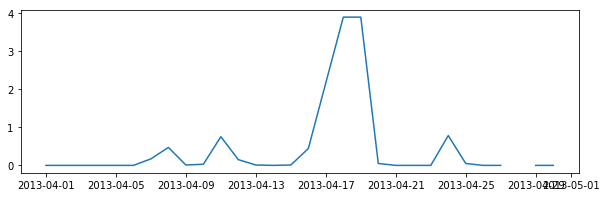

In [13]:
plt.figure(figsize=(10,3))
plt.plot(df_stn_1['ObservationDate'],df_stn_1['TotalPrecipAmt'])